## Bank Telemarketing Campaign

#### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

My target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing libraries.

In [432]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [433]:
#importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

## Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Reading the Dataset 

In [434]:
#reading the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_marketing_updated_v1.csv')
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [435]:
#Printing the head of the dataframe
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Fixing the Rows and Columns 

**Deleting summary rows**

#### Read the file without unnecessary headers

In [436]:
#reading the file in inp0 without first two rows as it is of no use.
inp0 = pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [437]:
# renaming column name salary to show the amount in INR
inp0.rename(columns={'salary': 'salary(inr)'}, inplace=True)

In [438]:
#printing the head of the dataframe
inp0.head()

,customerid,age,salary(inr),balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [439]:
#printing the information of variables to check their data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   45211 non-null  int64  
 1   age          45191 non-null  float64
 2   salary(inr)  45211 non-null  int64  
 3   balance      45211 non-null  int64  
 4   marital      45211 non-null  object 
 5   jobedu       45211 non-null  object 
 6   targeted     45211 non-null  object 
 7   default      45211 non-null  object 
 8   housing      45211 non-null  object 
 9   loan         45211 non-null  object 
 10  contact      45211 non-null  object 
 11  day          45211 non-null  int64  
 12  month        45161 non-null  object 
 13  duration     45211 non-null  object 
 14  campaign     45211 non-null  int64  
 15  pdays        45211 non-null  int64  
 16  previous     45211 non-null  int64  
 17  poutcome     45211 non-null  object 
 18  response     45181 non-null  object 
dtypes: f

#### Dropping customer id column. 

In [440]:
#drop the customer id as it is of no use.
inp0.drop('customerid', axis=1, inplace=True)
inp0.head()

,age,salary(inr),balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [441]:
# Droping the variable day
inp0.drop('day', axis=1, inplace=True)
inp0.head()

,age,salary(inr),balance,marital,jobedu,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [442]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0['jobedu'].apply(lambda x: x.split(",")[0])

In [443]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x: x.split(",")[1])

In [444]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu', axis=1, inplace=True)
inp0.head()

,age,salary(inr),balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the value of month from the column 'month'

#### Checking missing values

In [445]:
inp0.isnull().sum()

age            20
salary(inr)     0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
month          50
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
response       30
job             0
education       0
dtype: int64

### Impute/Remove missing values 

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### Handling missing values in age column.

In [446]:
#counting the missing values in age column
inp0.age.isnull().sum()

np.int64(20)

In [447]:
#printing the shape of dataframe before removing missing values
inp0.shape

(45211, 18)

In [448]:
#calculating the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

In [449]:
#droping the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0[-inp0.age.isnull()].copy()
inp1.shape

(45191, 18)

In [450]:
# After dropping the missing values we need to change the datatype from float to int
#convert the age variable data type from float to integer.
inp1['age'] = inp1['age'].apply(int)

In [451]:
# rechecking null values
inp1.age.isnull().sum()

np.int64(0)

#### Handling missing values in month column

In [452]:
#counting the missing values in month column in inp1
inp1.month.isnull().sum()

np.int64(50)

In [453]:
#printing the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [454]:
# finding the mode of month in inp1
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [455]:
# filling the missing values with mode value of month in inp1
inp1.month.fillna(month_mode, inplace=True)

In [456]:
#let's see the null values in the month column.
inp1.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [457]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

np.int64(30)

In [458]:
#calculate the percentage of missing values in response column. 
missing_percentage = inp1['response'].isnull().mean() * 100
print(f"Percentage of missing values is '{missing_percentage}%")

Percentage of missing values is '0.06638489964816004%


Target variable is better of not imputed.
- Drop the records with missing values.

In [459]:
#checking the shape before removing the data
inp1.shape

(45191, 18)

In [460]:
#drop the records with response missings in inp1.
inp1 = inp1[-inp1.response.isnull()].copy()


In [461]:
#calculate the missing values in each column of data frame: inp1.
inp0.isnull().sum()

age            20
salary(inr)     0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
month          50
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
response       30
job             0
education       0
dtype: int64

#### Handling pdays column. 

In [462]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.

In [463]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0, "pdays"] = np.nan
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

The above step has been done believing that the -1 indicates that the person has not been contacted before.

### Handling Missing values in response

In [464]:
inp1.response.isnull().sum()

np.int64(0)

In [465]:
# checking percentage of missing values
float(100.0*20/45211)

0.04423702196368141

In [466]:
# checking the shape before removing the missign values
inp1.shape

(45161, 18)

In [467]:
# removing the null values
inp1 = inp0[-inp0.age.isnull()].copy()
inp1.shape

(45191, 18)

### Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [468]:
#describe the age variable in inp1.
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

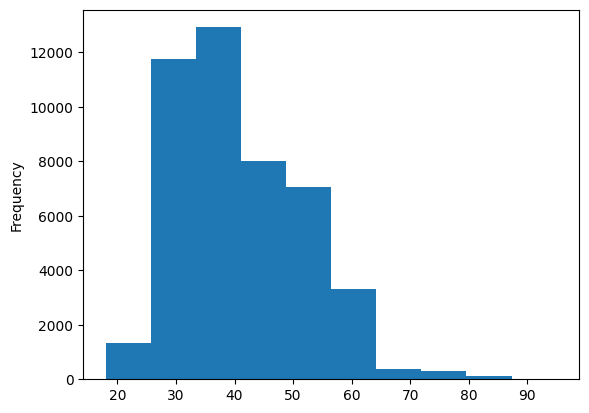

In [469]:
#plot the histogram of age variable.
inp1.age.plot.hist()
plt.show()

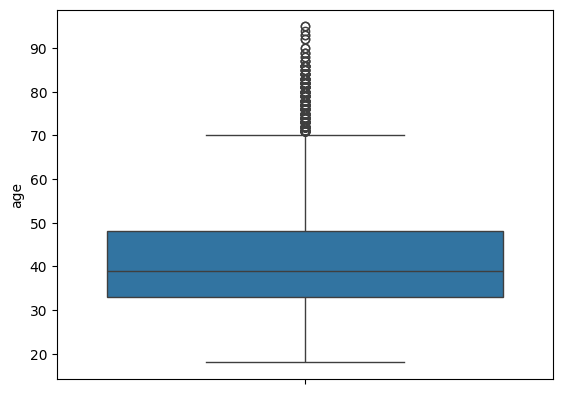

In [470]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [471]:
#describe the salary variable of inp1.
inp1['salary(inr)'].describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary(inr), dtype: float64

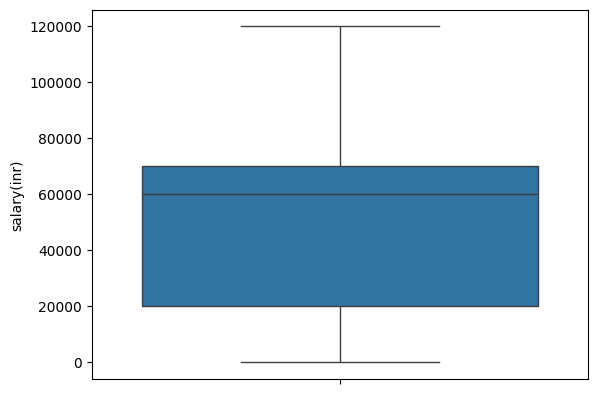

In [472]:
#plot the boxplot of salary variable.
sns.boxplot(inp1['salary(inr)'])
plt.show()

#### Balance variable 

In [473]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Here we can see that the minimum value is -8019 which is okay as it balance assuming people can be in debt. Also, there is a big difference b/w the mean and the median. Whereas, from 75% percentile to maximum there is even more big difference. we can try building ox plot to investigate further to check for outliers. 

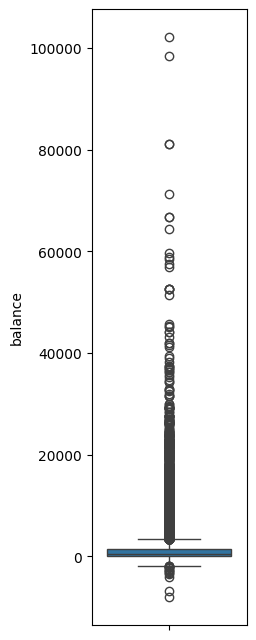

In [474]:
#plot the boxplot of balance variable.
plt.figure(figsize=[2,8])
sns.boxplot(inp1.balance)
plt.show()

In [475]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

After checking the percentile we can say that ter .95 percentile everything is outlier. Now we can further check whether to keep these records or just remove it and it requires some further investigation to analyze. 

In [476]:
inp1[inp1.balance > 15000].describe()

,age,salary(inr),balance,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,45.341880,70008.547009,24295.780627,2.749288,32.475783,0.555556
std,12.114333,34378.272805,12128.560693,3.036886,87.738924,1.784590
min,23.000000,0.000000,15030.000000,1.000000,-1.000000,0.000000
25%,35.000000,50000.000000,17074.000000,1.000000,-1.000000,0.000000
50%,44.000000,60000.000000,20723.000000,2.000000,-1.000000,0.000000
75%,55.000000,100000.000000,26254.000000,3.000000,-1.000000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,589.000000,23.000000


after checking the above details we can say that people having higher balance are high on age, high on salary, and they responded positvely in previous campaign and we can assume they would be prone to accepting the campaign so dropping these might effect the analysis. Maybe we can create a cap for these values. 

So these high values won't effect the analysis moving forward what we can do rather than looking at the mean, we can look at quantiles/percentiles insted.as these are not affected by outliers.

### Standardising values 

General standardising rules
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [477]:
#describing the duration variable of inp1
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [478]:
#converting the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [479]:
#describing the duration variable
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec") > 0 else float(x.split()[0]))

In [480]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate Analysis 

### Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [481]:
#calculating the percentage of each marital status category. 
inp1.marital.value_counts()

marital
married     27204
single      12786
divorced     5201
Name: count, dtype: int64

In [482]:
inp1.marital.value_counts(normalize=True)

marital
married     0.601978
single      0.282932
divorced    0.115089
Name: proportion, dtype: float64

<Axes: ylabel='marital'>

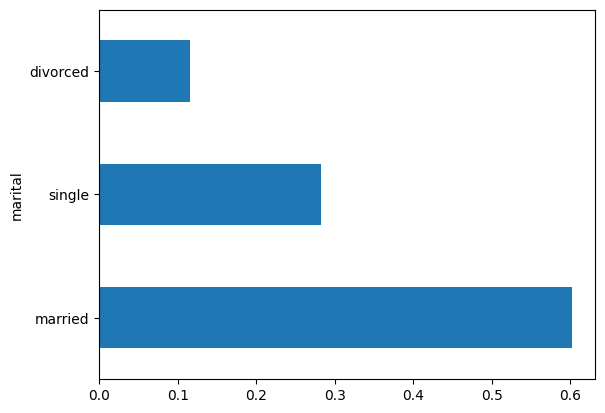

In [483]:
#ploting the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()

#### Job  

In [484]:
#calculating the percentage of each job status category.
inp1.job.value_counts(normalize=True)

job
blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: proportion, dtype: float64

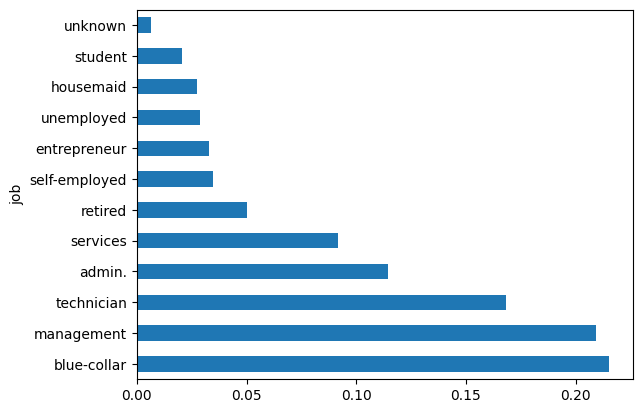

In [485]:
#ploting the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [486]:
#calculating the percentage of each education category.
inp1.education.value_counts()

education
secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: count, dtype: int64

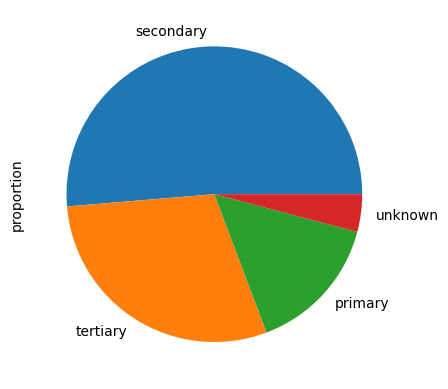

In [487]:
#ploting the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

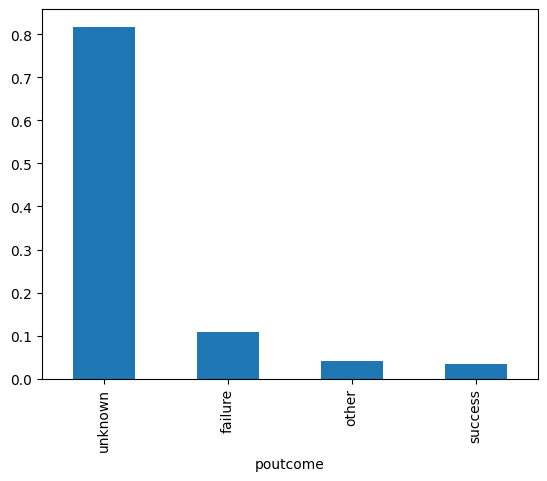

In [488]:
#calculating the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

In [489]:
# renaming unknown as unreached
inp1['poutcome'].replace({'unknown': 'unreached'}, inplace=True)

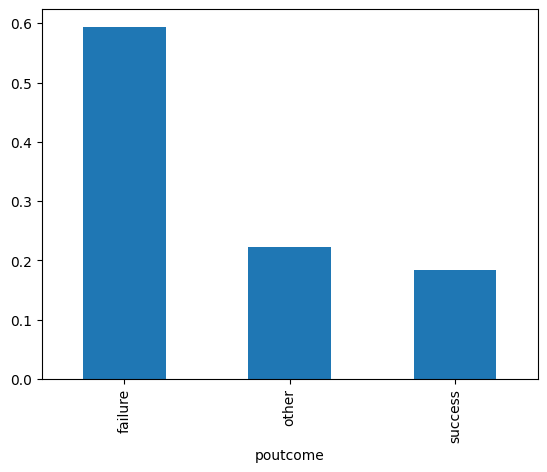

In [490]:
inp1[~(inp1.poutcome=="unreached")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable 

#calculating the percentage of each response category.
inp1.response.value_counts(normalize=True)

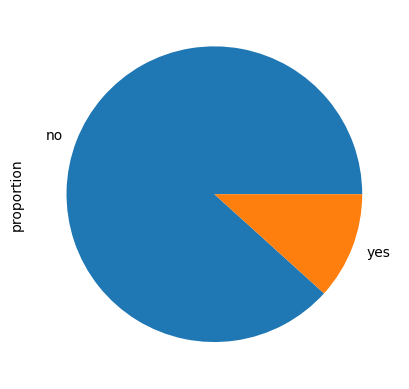

In [491]:
#ploting the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Bivariate and Multivariate Analysis

Numerical - Numerical

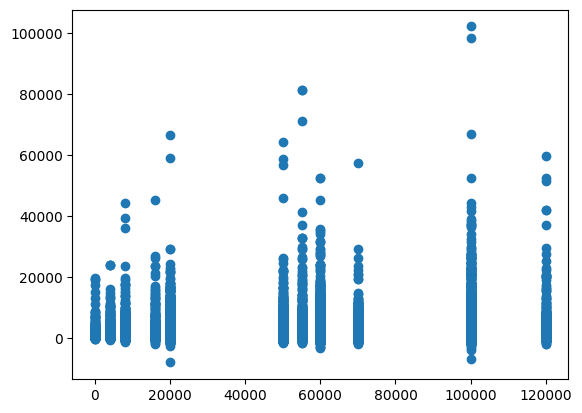

In [492]:
#ploting the scatter plot of balance and salary variable in inp1
plt.scatter(inp1['salary(inr)'], inp1.balance)
plt.show()

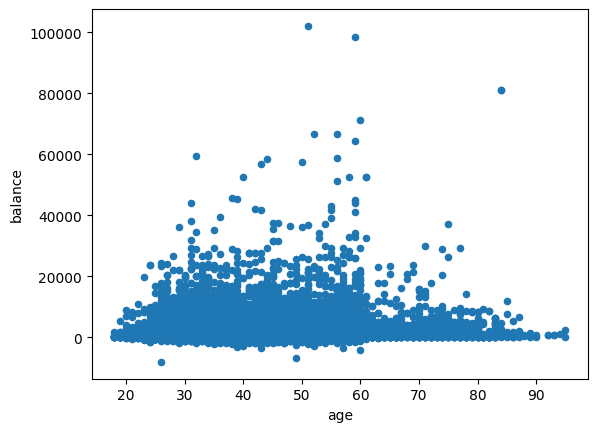

In [493]:
#ploting the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x="age", y="balance")
plt.show()

There is generally said that will increasing age people have more balance in their bank. which is not holding true here. I we don't see any strong pattern in the age and balance. 

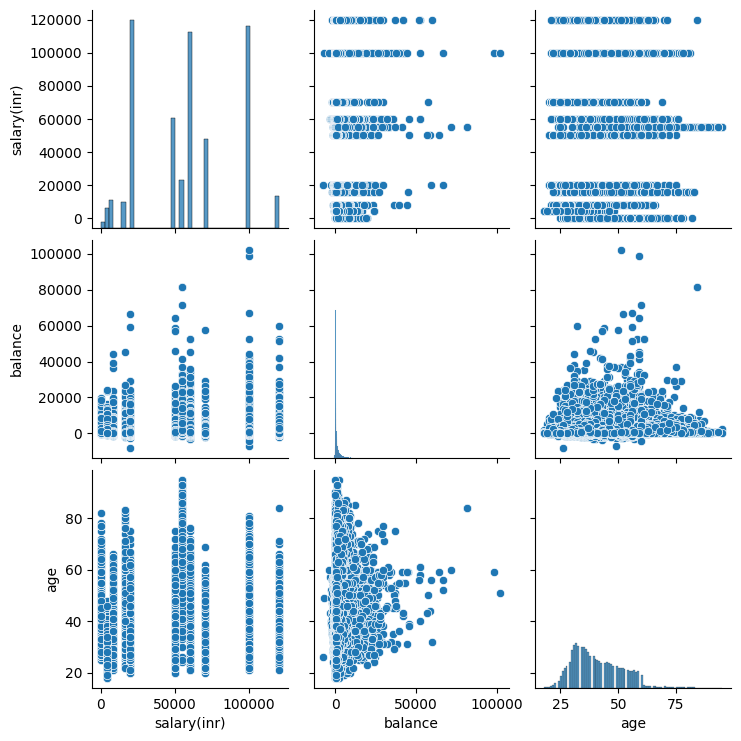

In [494]:
#ploting the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=['salary(inr)', 'balance','age'])
plt.show()

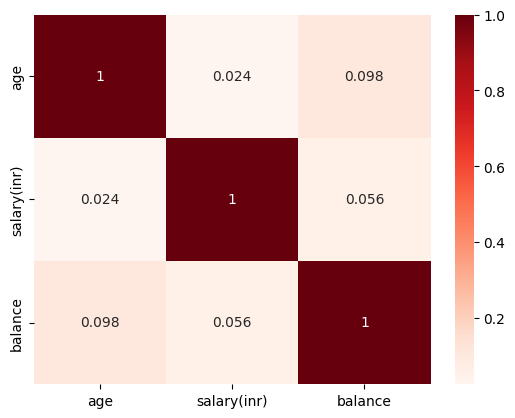

In [495]:
# Creating correlation heatmap betweent the numerical variables
sns.heatmap(inp1[['age', 'salary(inr)', 'balance']].corr(), annot=True, cmap='Reds')
plt.show()

### Job Vs. Salary

In [496]:
job_salary_avg = inp1.groupby('job')['salary(inr)'].mean()
job_salary_avg

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary(inr), dtype: float64

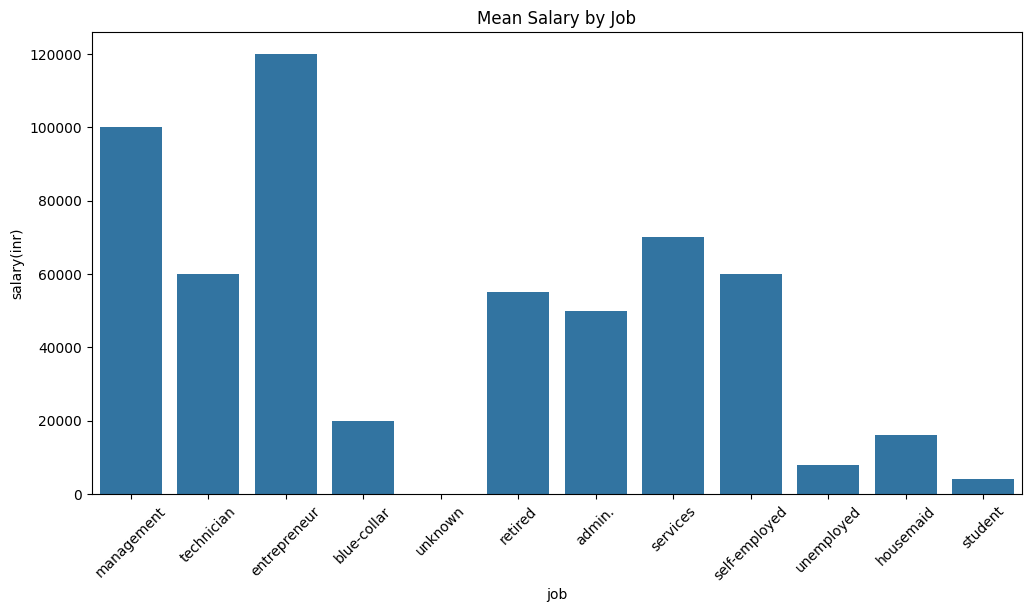

In [497]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='salary(inr)', data=inp1, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Mean Salary by Job')
plt.show()

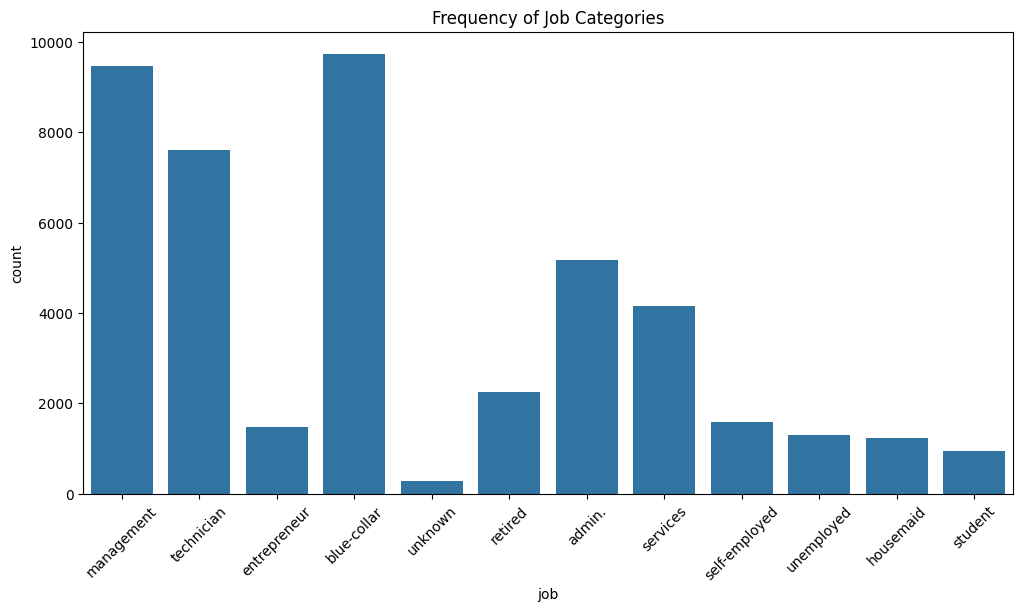

In [498]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=inp0)
plt.xticks(rotation=45)
plt.title('Frequency of Job Categories')
plt.show()

Numerical-Categorical variables

In [499]:
#groupby of the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")['salary(inr)'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary(inr), dtype: float64

In [500]:
#groupby of the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")['salary(inr)'].median()

response
no     60000.0
yes    60000.0
Name: salary(inr), dtype: float64

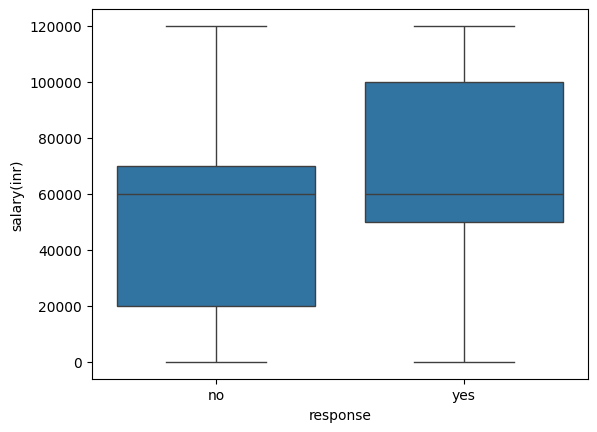

In [501]:
#ploting the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x="response", y="salary(inr)")
plt.show()

Using the boxplot we can say that there is some relation b/w the salary and the response. People who have more salary they ahve responded yes to the campaign.

Ploting the box plot of balance for yes & no responses. Here we already know that the balance is highly skewed and have some high values!

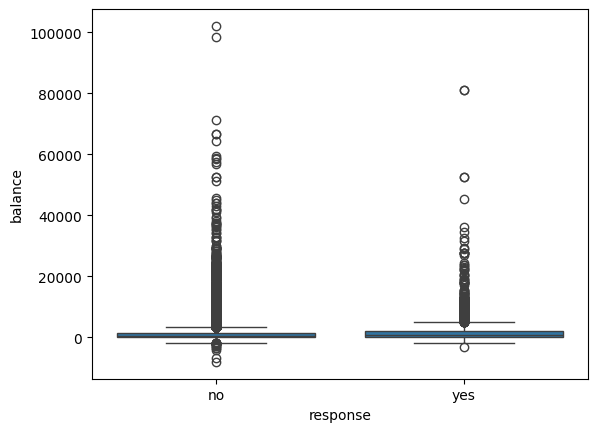

In [502]:
sns.boxplot(data=inp1, x='response', y='balance')
plt.show()

In [503]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [504]:
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

#### Calculating 75 percentile

In [505]:
def p75(x):
    return np.quantile(x, 0.75)

In [506]:
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


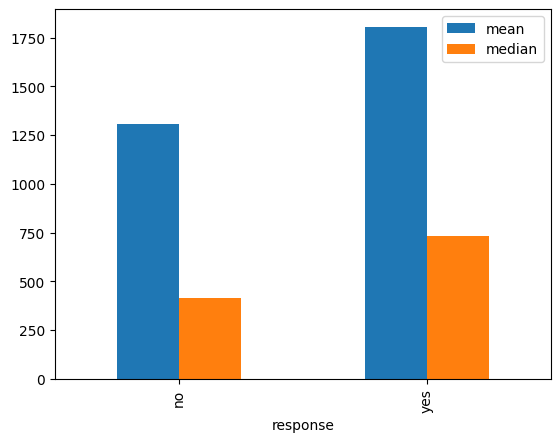

In [507]:
inp1.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

The mean and median values of the balance variable are higher for customers who gave a positive response, which is again true, because people who have higher balance in their bank accounts are more likely to invest in term deposits.

#### Categorical - Categorical Analysis

Here I am converting the 'Yes' and 'No' values of the response column to 0 and 1 to caluculate the percentage level

In [508]:
inp1['response_flag'] = np.where(inp1.response=="yes", 1, 0)

In [509]:
# checking the value counts of newly created variable
inp1.response_flag.value_counts()

response_flag
0    39906
1     5285
Name: count, dtype: int64

In [510]:
# confirming the number with the old response column
inp1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [511]:
# checking the percentage of the response column
inp1.response.value_counts(normalize=True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

In [512]:
inp1.response_flag.mean()

np.float64(0.11694806488017526)

Now after converting the response to convenient format. Now we can calculate the response rate for any education level.

#### Education Vs. Response Rate

In [513]:
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

According to the above analytics we can say as thte education level increase the response rate also increases. So, education has some sort of effect. 

#### Marital vs. response rate

In [514]:
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

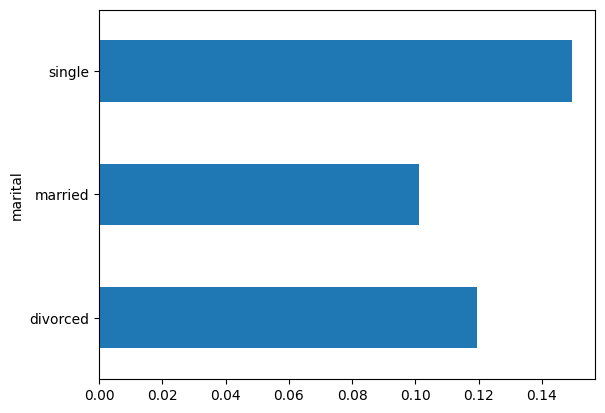

In [515]:
inp1.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

Looks life people with single marital status should be prefered more over married and divorsed.  

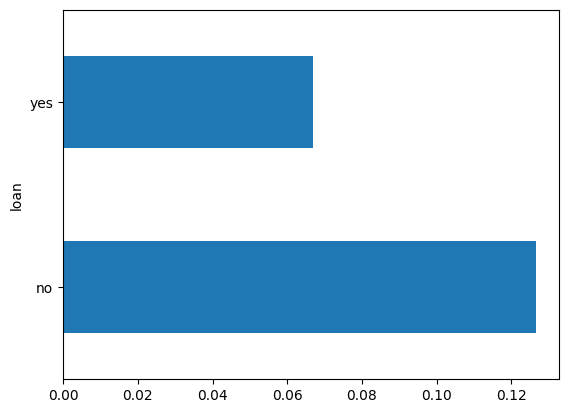

In [516]:
inp1.groupby(['loan'])['response_flag'].mean().plot.barh()
plt.show()

People who already have a personal loan are less likely to take term deposit.

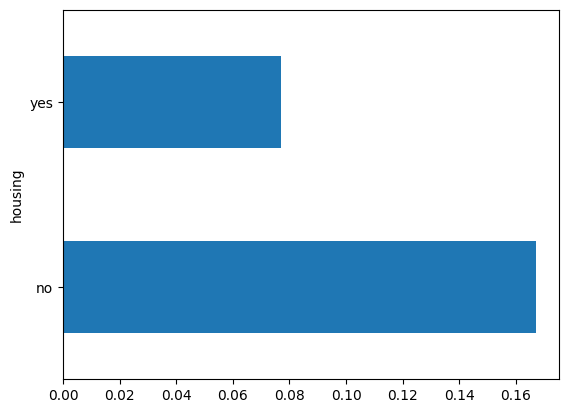

In [517]:
inp1.groupby(['housing'])['response_flag'].mean().plot.barh()
plt.show()

#### Age Vs. Response

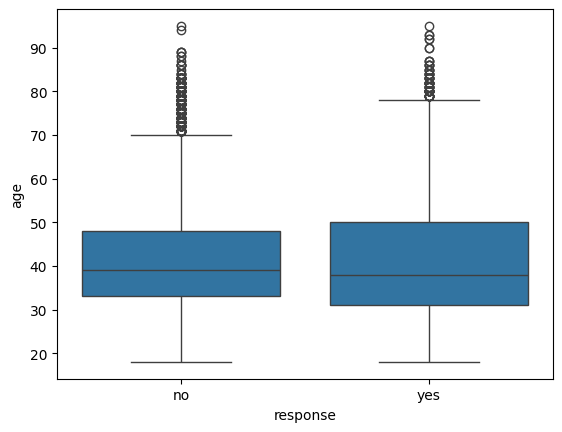

In [518]:
sns.boxplot(data=inp1, x="response", y="age")
plt.show()

The median and average values seems same but we do see something goinon in heigher age group and we will analyse further to dive deeper in this by make age buckets. 

Making buckets from the age column

In [519]:
pd.cut(inp1.age[:5], [0,30,40,50,60,9999], labels=["<30", "30-40", "40-50", "50-60", "60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [520]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [521]:
inp1['age_group'] = pd.cut(inp1.age, [0,30,40,50,60,9999],  labels=["<30", "30-40", "40-50", "50-60", "60+"])

In [522]:
inp1.age_group.value_counts(normalize=True)

age_group
30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: proportion, dtype: float64

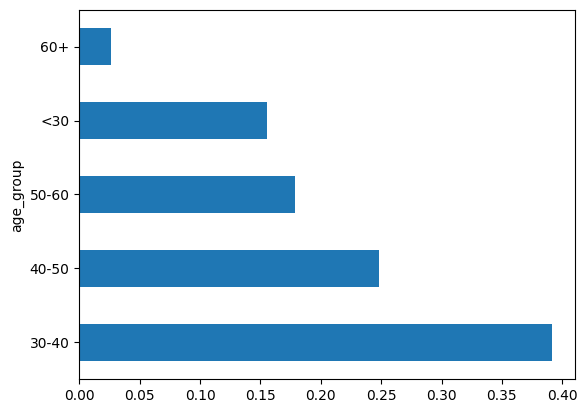

In [523]:
inp1.age_group.value_counts(normalize=True).plot.barh()
plt.show()

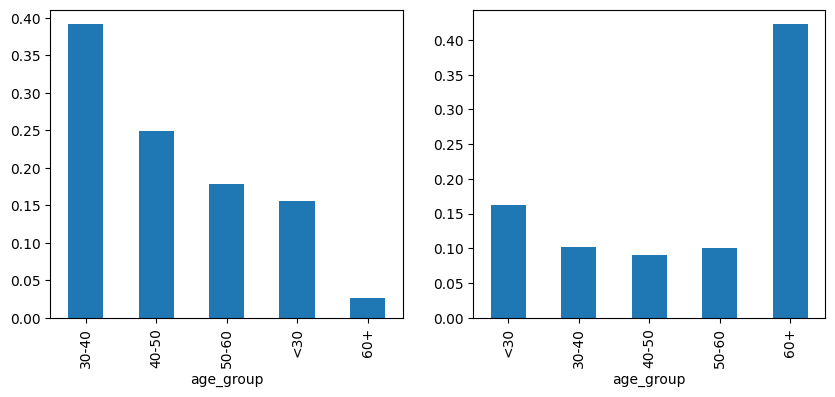

In [524]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

Age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age.

#### Job Vs. response

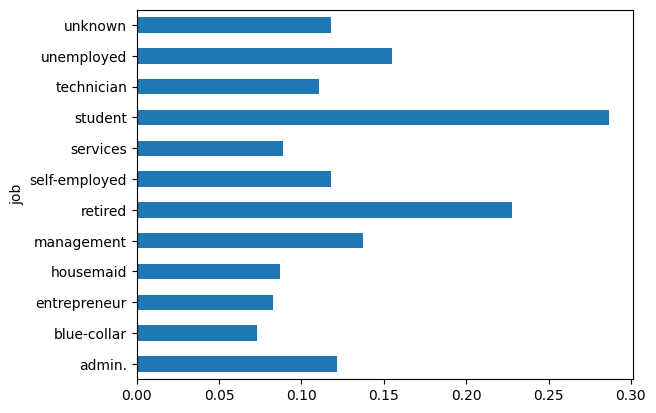

In [525]:
inp1.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### Multivariate Analysis

#### Education  Vs. Marital Vs. Response

In [526]:
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


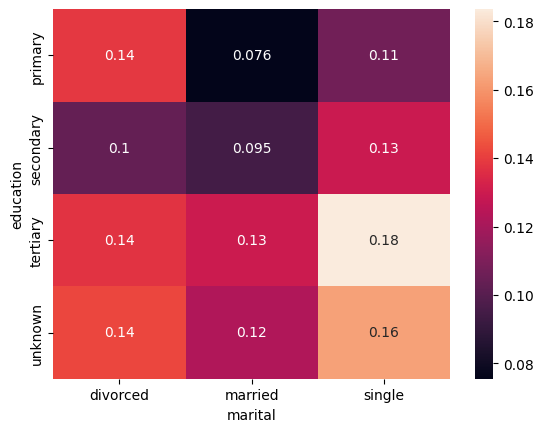

In [527]:
sns.heatmap(res, annot=True)
plt.show()

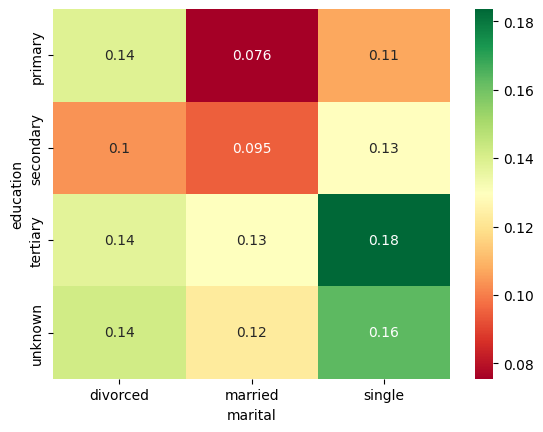

In [528]:
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

##### Job Vs. Marital Vs. Response

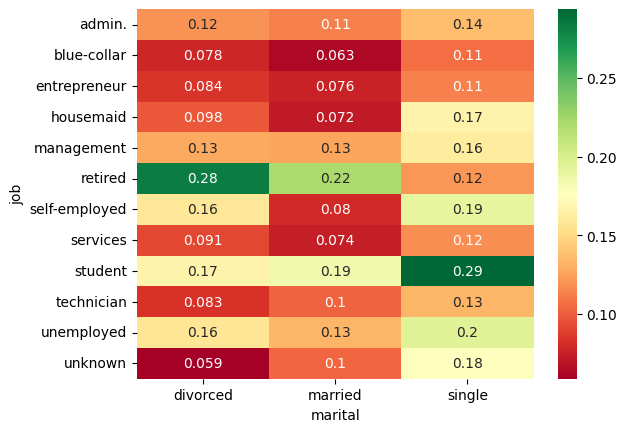

In [529]:
res = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

##### Education Vs. poutcome Vs. response

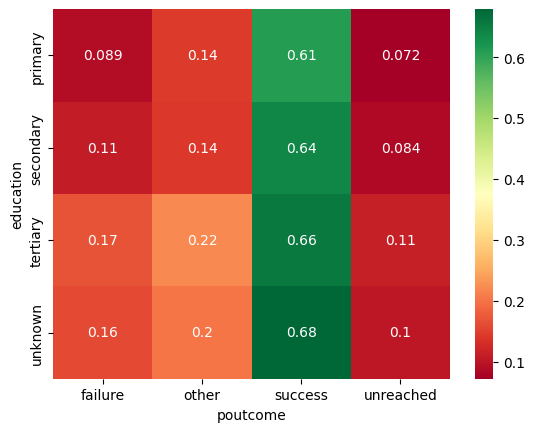

In [530]:
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()